<a href="https://colab.research.google.com/github/sumayya-md/oasis-infobyte/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries for classification taskimport numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#correlation matrix
numerical_columns = iris.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()
correlation_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

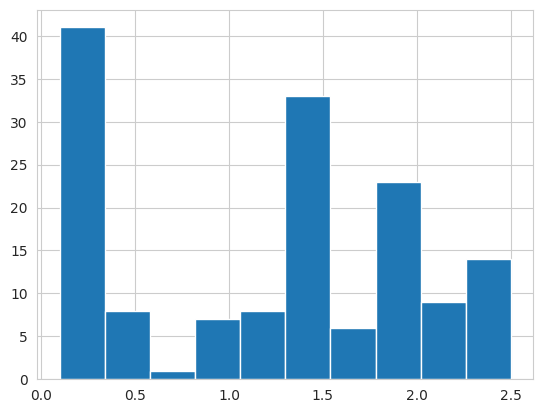

In [ ]:
iris['petal_width'].hist()

<Axes: >

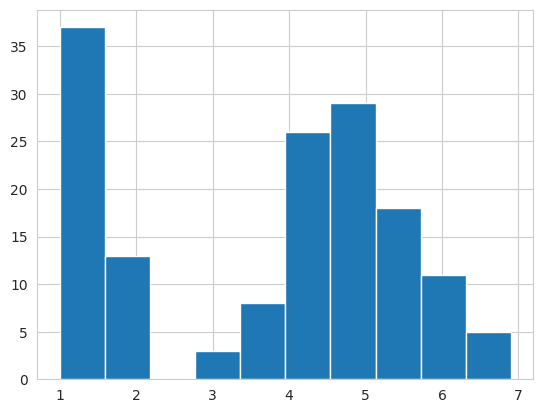

In [ ]:
iris['petal_length'].hist()

<Axes: >

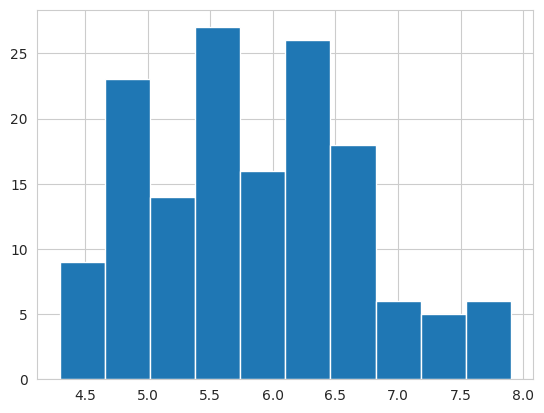

In [ ]:
iris['sepal_length'].hist()

<Axes: >

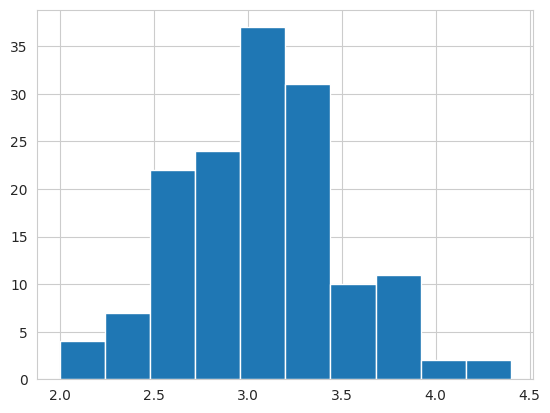

In [ ]:
iris['sepal_width'].hist()

In [ ]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

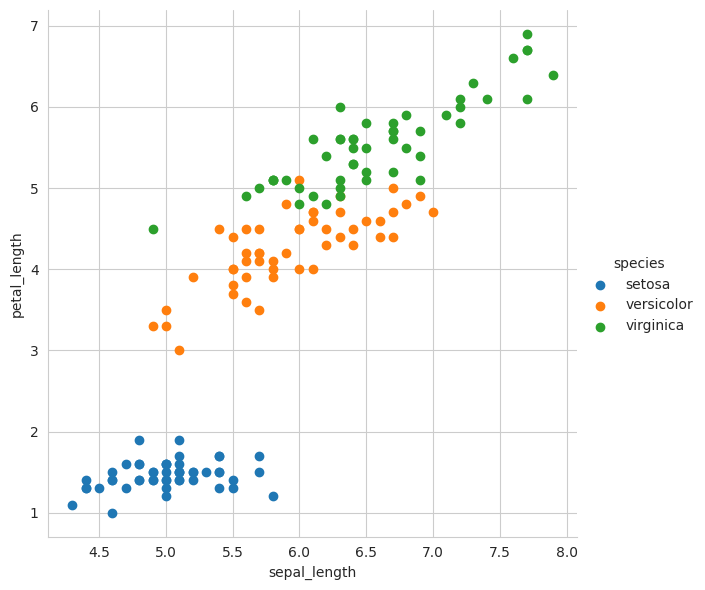

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="species",
			height = 6).map(plt.scatter,
							'sepal_length',
							'petal_length').add_legend()

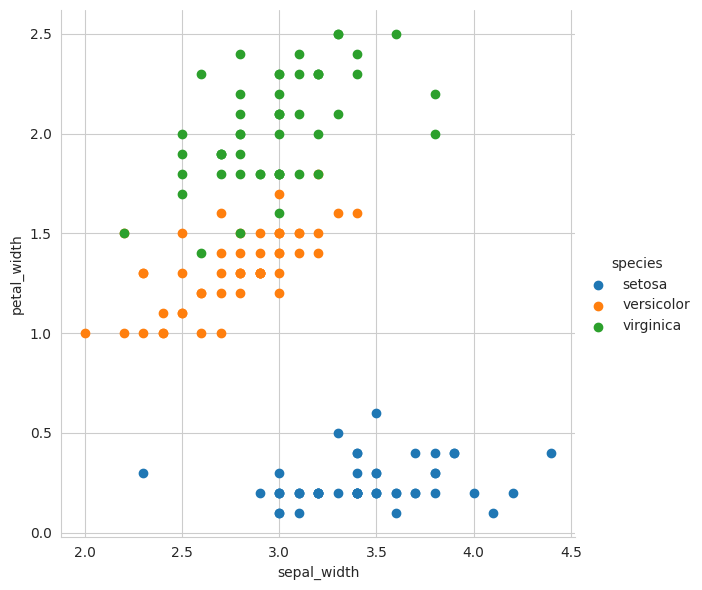

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="species",
			height = 6).map(plt.scatter,
							'sepal_width',
							'petal_width').add_legend()

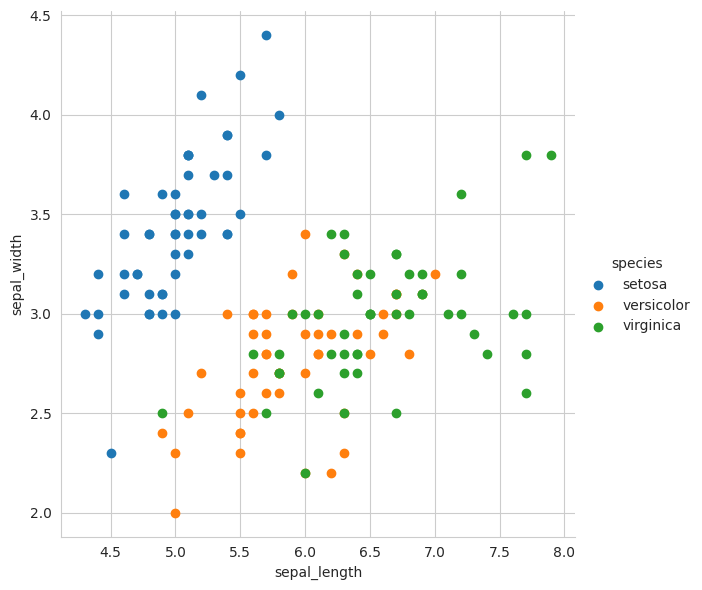

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="species",
			height = 6).map(plt.scatter,
							'sepal_length',
							'sepal_width').add_legend()

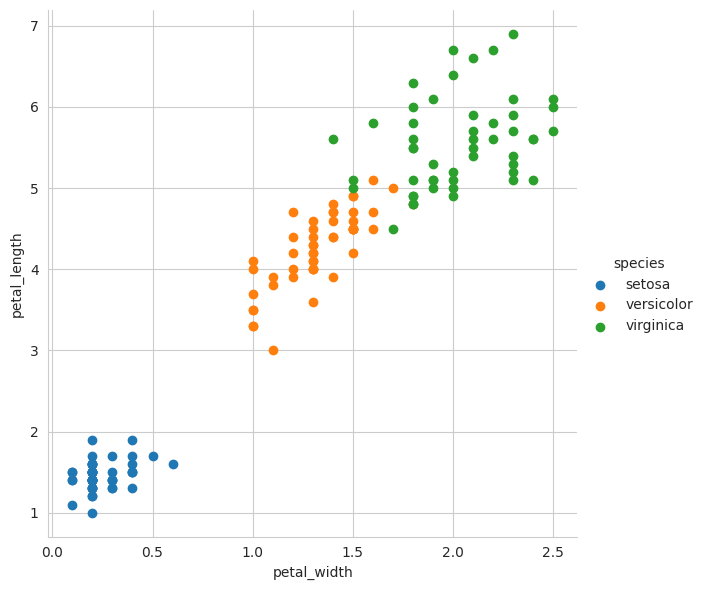

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="species",
			height = 6).map(plt.scatter,
							'petal_width',
							'petal_length').add_legend()

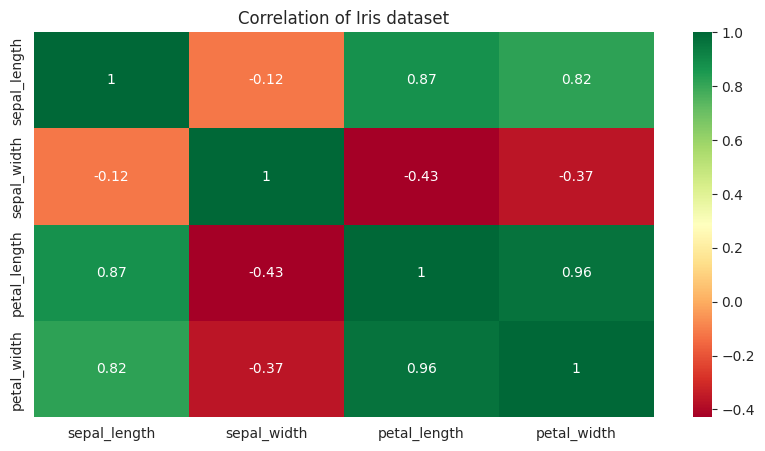

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True , cmap='RdYlGn')
plt.title("Correlation of Iris dataset")
plt.show()

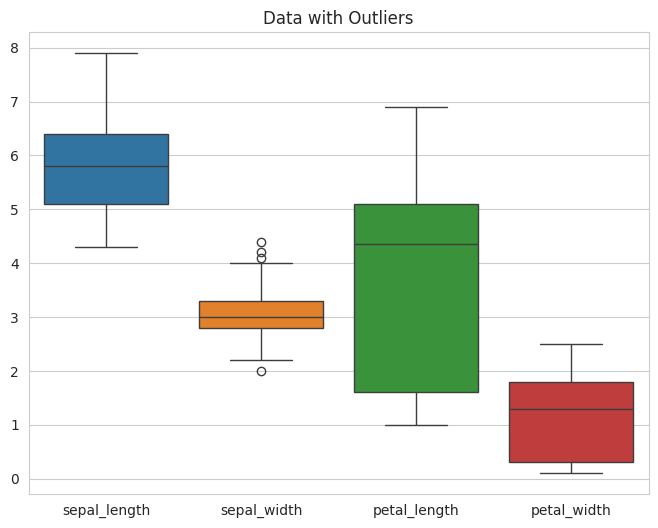

In [ ]:
# Visualize the data before handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris)
plt.title("Data with Outliers")
plt.show()

In [ ]:
#Building the classification model
X = iris.drop(['species'], axis=1)
y = iris['species']
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create model
lg = LogisticRegression()

#Fit the model
clf = lg.fit(X_train, y_train)
# Predict the model
y_pred = clf.predict(X_test)
#Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print("Accuracy Score : ", accuracy_score(y_test, y_pred)*100)

Accuracy Score :  100.0
